In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os,sys,time
import cv2

In [28]:
path = "./data/"

In [29]:
#Checking a sample image
img = plt.imread('./data/IMG_20190327_112613.jpg')

(3024, 4032, 3)


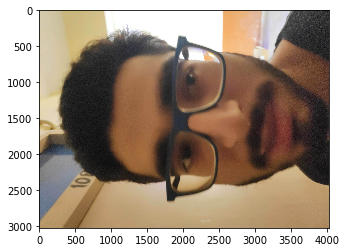

In [30]:
print(img.shape)
plt.imshow(img)

#Converting to grayscale
for file in os.listdir(path):
    image = cv2.imread(path+file)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2.imwrite("./data_grays/"+file, gray)

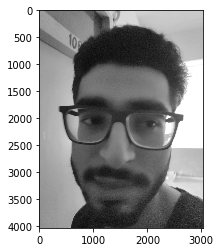

In [31]:
#Checking a sample image
img = plt.imread('./data_grays/IMG_20190327_112613.jpg')
plt.imshow(img,cmap="gray")


In [32]:
#Resizing the image
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    # return the resized image
    return gray

path_new = "./data_grays/"
for file in os.listdir(path_new):
    image = cv2.imread(path_new+file)
    resize = image_resize(image, height=70)
    cv2.imwrite("./data_grays_resized/"+file, resize)

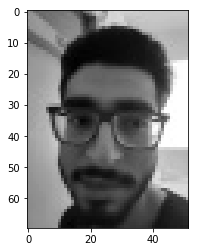

In [34]:
#Checking a sample image
img = plt.imread('./data_grays_resized/IMG_20190327_112613.jpg')
plt.imshow(img,cmap="gray")


In [35]:
print(img.shape)
l = img.shape[0]
r = img.shape[1]
print(l,r)

(70, 52)
70 52


#Creating DATA array
df = pd.DataFrame(columns=np.arange(l*r)+1)
path_new = "./data_grays_resized/"
i=0
categories=[]
for file in os.listdir(path_new):
    image = plt.imread(path_new+file)
    x = int(i/5)
    #print(x+1)
    categories.append(x)
    flt_image = image.flatten()
    df.loc[i] = flt_image
    i=i+1
df['category'] = np.array(categories)


In [9]:
#df.to_csv('data.csv',index=False)

In [36]:
df = pd.read_csv('data1.csv')
df.head()

,1,2,3,4,5,6,7,8,9,10,...,3632,3633,3634,3635,3636,3637,3638,3639,3640,category
0,223,222,222,221,221,220,220,220,219,219,...,140,131,148,150,136,136,90,67,92,1
1,225,224,224,223,222,222,222,221,222,219,...,222,224,224,227,226,224,219,220,219,1
2,108,124,156,213,216,218,214,216,213,215,...,87,85,71,68,78,94,104,110,90,1
3,245,244,242,241,239,238,237,237,235,234,...,52,54,58,50,48,57,59,68,63,1
4,148,150,149,149,150,150,149,151,150,152,...,20,20,20,20,20,20,20,19,18,1


In [37]:
df.shape

(45, 3641)

In [38]:
df_sort = df.sort_values(by=['category'])

In [39]:
X = df.drop(['category'],axis=1)

In [40]:
adj_matrix = X-X.mean()
adj_arr = adj_matrix.values.astype(float)
cov = np.matmul(adj_arr,adj_arr.T)

In [41]:
eig_value, eig_vec = np.linalg.eig(cov)

In [42]:
eig_vec.shape

(45, 45)

In [43]:
eig_vec

array([[-0.06327506,  0.10332004, -0.10518424, ..., -0.15510733,
        -0.08713018,  0.20751411],
       [-0.19355102,  0.08138599, -0.06053825, ...,  0.15514219,
         0.01101188, -0.27642638],
       [ 0.19604455, -0.01825142, -0.01956199, ...,  0.00157715,
        -0.06629764,  0.27626484],
       ...,
       [ 0.05531678,  0.14837305,  0.03013836, ..., -0.172396  ,
         0.10068094,  0.10582298],
       [ 0.26881107, -0.23789673, -0.17014032, ...,  0.25044921,
         0.14678525, -0.0582405 ],
       [-0.21798002, -0.11733159, -0.06957012, ...,  0.10499405,
         0.12802335,  0.05189615]])

In [44]:
eig_value.shape

(45,)

In [45]:
eig_value

array([9.05494944e+07, 4.96347984e+07, 3.60718160e+07, 3.15977329e+07,
       2.19403798e+07, 1.95892376e+07, 1.76018072e+07, 1.46149676e+07,
       1.32027435e+07, 1.18555818e+07, 1.14938607e+07, 1.07678903e+07,
       9.76798978e+06, 9.17675236e+06, 5.08873052e-09, 8.16495093e+06,
       8.00707652e+06, 7.31801124e+06, 6.87613019e+06, 6.77296039e+06,
       6.12259799e+06, 5.92858236e+06, 5.72214269e+06, 5.29656266e+06,
       1.86788264e+06, 4.96768652e+06, 4.76506444e+06, 4.54300946e+06,
       4.41621574e+06, 2.09132638e+06, 2.19053912e+06, 2.30305407e+06,
       2.39909140e+06, 2.50441770e+06, 2.52786359e+06, 2.72866212e+06,
       2.80176057e+06, 2.95979424e+06, 3.09993424e+06, 3.33905613e+06,
       3.41759396e+06, 3.60037514e+06, 3.99336227e+06, 3.94716507e+06,
       3.82729705e+06])

In [46]:
eig_face = np.matmul(eig_vec.T, adj_arr)

In [47]:
print(eig_face.shape)

(45, 3640)


In [78]:
indices_sorted = np.argsort(eig_value)

## Weight of the eigenface

In [48]:
sig = np.matmul(eig_face, adj_arr.T)
sig

array([[-5.72952486e+06, -1.75259467e+07,  1.77517348e+07, ...,
         5.00890679e+06,  2.43407069e+07, -1.97379804e+07],
       [ 5.12826944e+06,  4.03957730e+06, -9.05905690e+05, ...,
         7.36446621e+06, -1.18079564e+07, -5.82372991e+06],
       [-3.79418642e+06, -2.18372448e+06, -7.05636654e+05, ...,
         1.08714539e+06, -6.13727043e+06, -2.50952067e+06],
       ...,
       [-6.19399740e+05,  6.19538973e+05,  6.29811977e+03, ...,
        -6.88439685e+05,  1.00013442e+06,  4.19279283e+05],
       [-3.43917207e+05,  4.34657117e+04, -2.61687710e+05, ...,
         3.97404274e+05,  5.79385619e+05,  5.05329279e+05],
       [ 7.94218135e+05, -1.05796586e+06,  1.05734761e+06, ...,
         4.05015968e+05, -2.22903695e+05,  1.98621984e+05]])

In [49]:
sig.shape

(45, 45)

In [50]:
n_classes = 9

In [51]:
y = df.category.values


In [52]:
## Mean of the projected face
mean_face = np.mean(sig,axis=1)

## calculating mean of the classes

In [53]:
k = 45
df_face = pd.DataFrame(sig.T,columns = range(k))
print(df_face.shape)

(45, 45)


In [54]:
df_face['category'] = y

In [55]:
df_face.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,category
0,-5.729525e+06,5.128269e+06,-3.794186e+06,-5.285760e+06,-5.357893e+06,4.352872e+06,-4.898340e+06,1.381007e+06,-1.172048e+06,-6.321815e+05,...,-369349.794906,396471.989639,-285578.370268,-628880.416887,-734374.779997,344649.437771,-619399.740416,-343917.206656,7.942181e+05,1
1,-1.752595e+07,4.039577e+06,-2.183724e+06,-5.322565e+06,-7.619485e+06,-2.268365e+06,-1.146031e+06,5.864867e+06,1.120558e+06,3.278643e+05,...,70109.047049,-132976.820956,570616.803198,66317.341635,47452.918995,-181338.578006,619538.973466,43465.711664,-1.057966e+06,1
2,1.775173e+07,-9.059057e+05,-7.056367e+05,-1.896526e+06,2.162149e+06,-2.468082e+06,-2.017621e+06,-2.967986e+06,-6.827882e+04,5.967922e+05,...,157549.324731,40184.272044,-252568.901002,-181793.436144,-137219.974428,-243612.867993,6298.119768,-261687.710396,1.057348e+06,1
3,-3.291611e+07,-1.690883e+06,2.938387e+06,3.016798e+06,3.433576e+05,2.506904e+06,2.058166e+05,-1.138713e+06,-1.070250e+06,2.091790e+06,...,428830.546089,171529.174789,226089.815852,101351.096505,-622631.744415,-531073.091153,594811.055404,-423796.323196,2.117790e+05,1
4,-5.141219e+06,2.414298e+06,1.429740e+07,6.014733e+06,2.778276e+06,1.769680e+06,-1.655284e+06,2.307545e+06,-2.304757e+06,-2.182435e+06,...,4041.022285,-649996.746387,44283.680116,455346.885582,418717.530101,238981.803202,-328821.953768,250605.891897,-1.949729e+05,1


In [56]:
df_class_group = df_face.groupby('category', as_index=False)
df_class_mean_ = df_class_group.mean()
df_class_mean = df_class_mean_.drop('category',axis=1)
#df_class_group.get_group(3)

In [57]:
within_class = []
for i in range(n_classes):
    within_class.append(df_class_group.get_group(i+1).drop('category',axis=1).values - df_class_mean.values[i])

In [58]:
len(within_class)
within_class

[array([[ 2.98268738e+06,  3.33119811e+06, -5.90463356e+06,
         -4.59109639e+06, -3.81917354e+06,  3.57427064e+06,
         -2.99604846e+06,  2.91663162e+05, -4.73092860e+05,
         -6.72547507e+05, -3.17492405e+06, -1.11586455e+06,
          1.12065981e+06,  2.04775596e+06, -2.63387448e-09,
          5.66195929e+05,  1.39316705e+06, -4.31815784e+05,
         -3.88257292e+05, -2.36611649e+05, -1.66339143e+05,
         -2.11697117e+05,  1.12999221e+06, -4.32205078e+05,
         -1.83874682e+05, -3.80961288e+05, -4.73365024e+05,
          3.28480289e+05, -1.06842550e+06,  1.22153339e+04,
          2.73152496e+05,  5.24033851e+04, -4.12425406e+05,
         -2.86513452e+05, -3.93702240e+05, -6.22818446e+05,
         -4.27585824e+05,  4.31429616e+05, -3.46146976e+05,
         -5.91348711e+05, -5.28763570e+05,  4.19128097e+05,
         -6.73885031e+05, -1.96851279e+05,  6.32136951e+05],
        [-8.81373447e+06,  2.24250596e+06, -4.29417162e+06,
         -4.62790084e+06, -6.08076602e+

In [59]:
within_class[0].shape

(5, 45)

##  with in class scatter matrix

In [60]:
sw = np.zeros((k,k))
for i in range(n_classes):
    sw+=np.matmul(within_class[i].T,within_class[i])
print(sw.shape)
print(sw)

(45, 45)
[[ 7.03486245e+15  1.73563838e+14 -3.36980035e+13 ... -9.41685376e+12
   2.31338072e+12  5.00604685e+12]
 [ 1.73563838e+14  2.27841800e+15 -6.51650607e+12 ... -5.14810932e+12
   1.80967202e+12  6.38552714e+12]
 [-3.36980035e+13 -6.51650607e+12  1.18871424e+15 ... -9.74166795e+11
   3.76849460e+12 -4.17911049e+12]
 ...
 [-9.41685376e+12 -5.14810932e+12 -9.74166795e+11 ...  1.37191900e+13
  -1.38320373e+11  3.31460007e+11]
 [ 2.31338072e+12  1.80967202e+12  3.76849460e+12 ... -1.38320373e+11
   1.29906814e+13  2.26817275e+11]
 [ 5.00604685e+12  6.38552714e+12 -4.17911049e+12 ...  3.31460007e+11
   2.26817275e+11  1.35677749e+13]]


## Between class scatter matrix

In [61]:
mean_face = mean_face.reshape((k,1))
mean_face.shape

(45, 1)

In [62]:
between_class = []
for i in range(n_classes):
    between_class.append(df_class_mean.values[i]-mean_face.T)

In [63]:
sb = np.zeros((k,k))
for i in range(n_classes):
    dummy = df_class_mean.values[i].reshape((1,len(df_class_mean.values[i])))
    sb+=np.matmul(between_class[i].T, dummy)
print(sb)

[[ 2.32869697e+14 -3.47127677e+13  6.73960071e+12 ...  1.88337075e+12
  -4.62676144e+11 -1.00120937e+12]
 [-3.47127677e+13  3.70390429e+13  1.30330121e+12 ...  1.02962186e+12
  -3.61934404e+11 -1.27710543e+12]
 [ 6.73960071e+12  1.30330121e+12  2.24923346e+13 ...  1.94833359e+11
  -7.53698920e+11  8.35822098e+11]
 ...
 [ 1.88337075e+12  1.02962186e+12  1.94833359e+11 ...  4.45550442e+11
   2.76640746e+10 -6.62920014e+10]
 [-4.62676144e+11 -3.61934404e+11 -7.53698920e+11 ...  2.76640746e+10
   5.17886148e+11 -4.53634551e+10]
 [-1.00120937e+12 -1.27710543e+12  8.35822098e+11 ... -6.62920014e+10
  -4.53634551e+10  2.16085565e+11]]


In [64]:
sb.shape

(45, 45)

In [65]:
## Criterion function
J = np.matmul(np.linalg.inv(sw),sb)

In [66]:
J.shape

(45, 45)

In [67]:
J

array([[-2.10290352e+14,  2.64294138e+13, -4.44173913e+13, ...,
        -1.30171555e+13, -7.66074166e+12, -2.04483005e+12],
       [ 3.70763667e+14,  6.61939098e+14, -6.78522386e+13, ...,
         3.58454997e+13, -2.46928728e+13, -4.14435428e+13],
       [ 1.50536209e+13, -2.94823118e+13, -3.50052616e+14, ...,
        -2.67708804e+13, -3.33914843e+13, -1.24526135e+13],
       ...,
       [-7.51024113e+15,  1.06869100e+15,  5.79659189e+14, ...,
        -3.20312044e+14, -4.75606500e+13, -1.02968821e+14],
       [ 9.20866275e+14,  4.13551334e+15, -3.54756127e+14, ...,
         3.74869090e+14,  3.56495309e+14, -1.00718588e+14],
       [-3.13334760e+14, -2.40136216e+15, -5.52482144e+14, ...,
        -2.91821434e+14, -1.06058704e+14,  5.01475043e+13]])

In [73]:
eig_value_, eig_vec_ = np.linalg.eig(J)

In [74]:
indices_sorted_ = np.argsort(eig_value_)

## Let us take  m = 20, 20 dimensions which have maximum eigenvalue

In [75]:
m=20
m_eig_values = eig_value_[indices_sorted_[::-1]][:m]

In [76]:
m_eig_values.shape

(20,)

## Calculating eigenvectors first m dimensions

In [79]:
m_eig_vec = eig_vec_[:,indices_sorted[::-1][:m]]

In [80]:
m_eig_vec.shape

(45, 20)

In [81]:
m_eig_vec

array([[-6.15116735e-17+0.00000000e+00j, -8.64354691e-17-3.36633940e-17j,
        -8.64354691e-17+3.36633940e-17j,  9.79375890e-17+4.89537793e-18j,
         9.79375890e-17-4.89537793e-18j, -2.03696795e-16+0.00000000e+00j,
         4.07678846e-16+0.00000000e+00j, -1.99899798e-17+0.00000000e+00j,
         3.18821280e-18+0.00000000e+00j,  5.01177105e-18+1.97820848e-17j,
         5.01177105e-18-1.97820848e-17j,  3.55593886e-16+1.09836695e-15j,
         3.55593886e-16-1.09836695e-15j,  1.26145786e-15+1.95548683e-15j,
        -1.48117599e-18+0.00000000e+00j, -2.23194397e-16+9.83748353e-16j,
        -2.23194397e-16-9.83748353e-16j,  3.17608760e-16-2.42520485e-16j,
         3.17608760e-16+2.42520485e-16j, -6.08798904e-16-1.75395051e-16j],
       [-8.31583130e-16+0.00000000e+00j,  3.22206774e-16+1.73984069e-17j,
         3.22206774e-16-1.73984069e-17j,  3.53307871e-16-2.93818259e-17j,
         3.53307871e-16+2.93818259e-17j, -2.89214272e-16+0.00000000e+00j,
         1.28827077e-16+0.00000000e+0

##  fisher face

In [82]:
ff = np.matmul(m_eig_vec.T,sig)
ff

array([[-1.05291775e-08+0.00000000e+00j, -1.05291775e-08+0.00000000e+00j,
        -1.05291775e-08+0.00000000e+00j, -1.05291775e-08+0.00000000e+00j,
        -1.05291775e-08+0.00000000e+00j, -3.06925258e-09+0.00000000e+00j,
        -3.06925258e-09+0.00000000e+00j, -3.06925258e-09+0.00000000e+00j,
        -3.06925258e-09+0.00000000e+00j, -3.06925258e-09+0.00000000e+00j,
        -5.63279620e-09+0.00000000e+00j, -5.63279620e-09+0.00000000e+00j,
        -5.63279620e-09+0.00000000e+00j, -5.63279620e-09+0.00000000e+00j,
        -5.63279620e-09+0.00000000e+00j,  2.69736006e-08+0.00000000e+00j,
         2.69736006e-08+0.00000000e+00j,  2.69736006e-08+0.00000000e+00j,
         2.69736006e-08+0.00000000e+00j,  2.69736006e-08+0.00000000e+00j,
        -3.11685662e-08+0.00000000e+00j, -3.11685662e-08+0.00000000e+00j,
        -3.11685662e-08+0.00000000e+00j, -3.11685662e-08+0.00000000e+00j,
        -3.11685662e-08+0.00000000e+00j, -2.67550587e-08+0.00000000e+00j,
        -2.67550587e-08+0.00000000e+00

# Creating the test images

In [83]:
path = "./test_data/"

In [85]:
#Checking a sample image
img = plt.imread('./test_data/005.jpg')

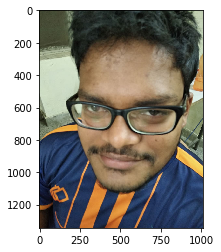

In [86]:
plt.imshow(img)

#Converting to grayscale
for file in os.listdir(path):
    image = cv2.imread(path+file)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2.imwrite("./test_data_grays/"+file, gray)

In [87]:
#Resizing the image
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    # return the resized image
    return gray

path_new = "./test_data_grays/"
for file in os.listdir(path_new):
    image = cv2.imread(path_new+file)
    resize = image_resize(image, height=70)
    cv2.imwrite("./test_data_grays_resized/"+file, resize)

#Checking a sample image
img = plt.imread('./test_data_grays_resized/007.jpg')
plt.imshow(img)
print(img.shape)
l = img.shape[0]
r = img.shape[1]
print(l,r)

#Creating DATA array
df = pd.DataFrame(columns=np.arange(l*r)+1)
path_new = "./test_data_grays_resized/"
i=0
categories=[]
for file in os.listdir(path_new):
    image = plt.imread(path_new+file)
    flt_image = image.flatten()
    categories.append(int(file[:3]))
    df.loc[i] = flt_image
    i=i+1
df['category'] = np.array(categories)

In [88]:
#df.to_csv('test_data1.csv',index=False)

In [89]:
df_test = pd.read_csv('test_data1.csv')
df_test.shape

(8, 3641)

## Testing on test data

In [90]:
X_test = df_test.drop(['category'],axis=1)
y_test = df_test['category']
y_train = df['category']

In [91]:
adj_matrix_test = X_test-X_test.mean()
adj_arr_test = adj_matrix_test.values.astype(float)


In [92]:
adj_arr_test.shape

(8, 3640)

In [93]:
proj_test_face = np.matmul(eig_face,adj_arr_test.T)

In [94]:
proj_test_face.shape

(45, 8)

In [95]:
proj_fisher_test = np.matmul(m_eig_vec.T,proj_test_face)

In [96]:
proj_fisher_test.shape

(20, 8)

In [97]:
print(ff)
print(ff.shape)

[[-1.05291775e-08+0.00000000e+00j -1.05291775e-08+0.00000000e+00j
  -1.05291775e-08+0.00000000e+00j -1.05291775e-08+0.00000000e+00j
  -1.05291775e-08+0.00000000e+00j -3.06925258e-09+0.00000000e+00j
  -3.06925258e-09+0.00000000e+00j -3.06925258e-09+0.00000000e+00j
  -3.06925258e-09+0.00000000e+00j -3.06925258e-09+0.00000000e+00j
  -5.63279620e-09+0.00000000e+00j -5.63279620e-09+0.00000000e+00j
  -5.63279620e-09+0.00000000e+00j -5.63279620e-09+0.00000000e+00j
  -5.63279620e-09+0.00000000e+00j  2.69736006e-08+0.00000000e+00j
   2.69736006e-08+0.00000000e+00j  2.69736006e-08+0.00000000e+00j
   2.69736006e-08+0.00000000e+00j  2.69736006e-08+0.00000000e+00j
  -3.11685662e-08+0.00000000e+00j -3.11685662e-08+0.00000000e+00j
  -3.11685662e-08+0.00000000e+00j -3.11685662e-08+0.00000000e+00j
  -3.11685662e-08+0.00000000e+00j -2.67550587e-08+0.00000000e+00j
  -2.67550587e-08+0.00000000e+00j -2.67550587e-08+0.00000000e+00j
  -2.67550587e-08+0.00000000e+00j -2.67550587e-08+0.00000000e+00j
   4.43687

In [98]:
pred_list = []
for column in proj_fisher_test.T:
    min_dist = np.linalg.norm(column-ff.T[0])
    cat = y_train[0]
    index = 0
    for i,col in enumerate(ff.T):
        dist = np.linalg.norm(column-col)
        if dist < min_dist:
            min_dist = dist
            index = i
            cat = df.loc[i,'category']
    pred_list.append((min_dist,cat))
            
            

In [99]:
pred_list

[(1.4442681703569841e-07, 8),
 (1.0710784824064099e-07, 1),
 (7.463506759283983e-08, 1),
 (9.873191749246987e-08, 2),
 (1.21037092238988e-07, 7),
 (1.4132415635411476e-07, 5),
 (7.463506759283983e-08, 5),
 (1.232346085579661e-07, 7)]

## Accuracy on the test images

In [101]:
c=0
for i,actual in enumerate(y_test.values):
    if actual == pred_list[i][1]:
        c=c+1
print('Accuracy:',c/len(pred_list))

Accuracy: 0.375
